### Question1

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
def parta(w, x):
    z = np.dot(w, x)
    return 1 / (1 + np.exp(-z))

## Part b

In [3]:
def partb(pred, y_true):
    n = len(pred)
    loss = 0
    for i in range(n):
        # Avoid numerical issues with log(0)
        p = np.clip(pred[i], 1e-15, 1 - 1e-15)
        loss += -y_true[i] * np.log(p) - (1 - y_true[i]) * np.log(1 - p)
    return loss / n

## part c

In [4]:
def partc(pred, X, y):
    n = X.shape[0]
    error = pred - y
    grad = np.zeros(X.shape[1])

    for i in range(n):
        grad += error[i] * X[i]

    return grad / n

## part d

In [6]:
def partd(w, X, y, lr=0.1, max_iter=1000, tol=1e-6):
    curr_w = w.copy()
    n = X.shape[0]
    loss_hist = []

    for i in range(max_iter):
        # Make predictions with current weights
        pred = np.array([parta(curr_w, X[j]) for j in range(n)])

        # Calculate current loss
        curr_loss = partb(pred, y)
        loss_hist.append(curr_loss)

        # Calculate gradient
        grad = partc(pred, X, y)

        # Update weights
        new_w = curr_w - lr * grad

        # Check for convergence
        if np.linalg.norm(new_w - curr_w) < tol:
            print(f"Converged after {i+1} iterations")
            break

        curr_w = new_w

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {curr_loss:.6f}")

    return curr_w, loss_hist

## Part e


Training for Class 0 (setosa)
Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.127636
Iteration 200, Loss: 0.087936
Iteration 300, Loss: 0.070246
Iteration 400, Loss: 0.059770
Iteration 500, Loss: 0.052680
Iteration 600, Loss: 0.047487
Iteration 700, Loss: 0.043480
Iteration 800, Loss: 0.040271
Iteration 900, Loss: 0.037628
Training accuracy for class 0: 1.0000

Training for Class 1 (versicolor)
Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.580385
Iteration 200, Loss: 0.572376
Iteration 300, Loss: 0.569165
Iteration 400, Loss: 0.567430
Iteration 500, Loss: 0.566416
Iteration 600, Loss: 0.565786
Iteration 700, Loss: 0.565367
Iteration 800, Loss: 0.565067
Iteration 900, Loss: 0.564837
Training accuracy for class 1: 0.7167

Training for Class 2 (virginica)
Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.392481
Iteration 200, Loss: 0.379404
Iteration 300, Loss: 0.372232
Iteration 400, Loss: 0.367333
Iteration 500, Loss: 0.363806
Iteration 600, Loss: 0.361201
Iteration 700, Loss:

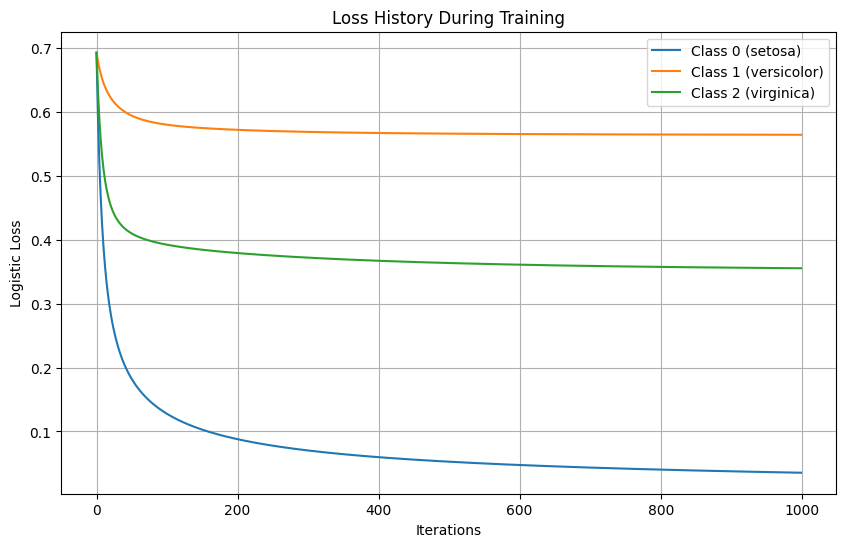

In [7]:
def parte():

    # Load the Iris dataset
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42)

    # Number of features
    n_features = X_train.shape[1]

    # Number of classes
    n_classes = len(np.unique(y))

    # Store trained models
    weights = []
    loss_hist = []

    # Train a binary classifier for each class (one-vs-rest)
    for cls in range(n_classes):
        print(f"\nTraining for Class {cls} ({iris.target_names[cls]})")

        # Create binary labels (1 for current class, 0 for other classes)
        bin_y = np.where(y_train == cls, 1, 0)

        # Initialize weights
        init_w = np.zeros(n_features)

        # Train the model
        opt_w, loss = partd(
            init_w, X_train, bin_y,
            lr=0.1, max_iter=1000)

        weights.append(opt_w)
        loss_hist.append(loss)

        # Evaluate on training data
        train_pred = np.array([parta(opt_w, x) for x in X_train])
        train_bin_pred = np.where(train_pred >= 0.5, 1, 0)

        # Calculate accuracy for this class
        train_acc = accuracy_score(bin_y, train_bin_pred)
        print(f"Training accuracy for class {cls}: {train_acc:.4f}")

    # Make predictions on test data
    cls_probs = np.zeros((X_test.shape[0], n_classes))

    for cls in range(n_classes):
        probs = np.array([
            parta(weights[cls], x) for x in X_test
        ])
        cls_probs[:, cls] = probs

    # Assign each sample to the class with the highest probability
    pred_cls = np.argmax(cls_probs, axis=1)

    # Evaluate the model
    test_acc = accuracy_score(y_test, pred_cls)
    print("\nTest accuracy:", test_acc)
    print("\nClassification Report:")
    print(classification_report(y_test, pred_cls, target_names=iris.target_names))

    # Plot the loss history for each class
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        plt.plot(loss_hist[i], label=f'Class {i} ({iris.target_names[i]})')
    plt.xlabel('Iterations')
    plt.ylabel('Logistic Loss')
    plt.title('Loss History During Training')
    plt.legend()
    plt.grid(True)
    plt.show()

    return weights, loss_hist


Training for Class 0 (setosa)
Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.127636
Iteration 200, Loss: 0.087936
Iteration 300, Loss: 0.070246
Iteration 400, Loss: 0.059770
Iteration 500, Loss: 0.052680
Iteration 600, Loss: 0.047487
Iteration 700, Loss: 0.043480
Iteration 800, Loss: 0.040271
Iteration 900, Loss: 0.037628
Training accuracy for class 0: 1.0000

Training for Class 1 (versicolor)
Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.580385
Iteration 200, Loss: 0.572376
Iteration 300, Loss: 0.569165
Iteration 400, Loss: 0.567430
Iteration 500, Loss: 0.566416
Iteration 600, Loss: 0.565786
Iteration 700, Loss: 0.565367
Iteration 800, Loss: 0.565067
Iteration 900, Loss: 0.564837
Training accuracy for class 1: 0.7167

Training for Class 2 (virginica)
Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.392481
Iteration 200, Loss: 0.379404
Iteration 300, Loss: 0.372232
Iteration 400, Loss: 0.367333
Iteration 500, Loss: 0.363806
Iteration 600, Loss: 0.361201
Iteration 700, Loss:

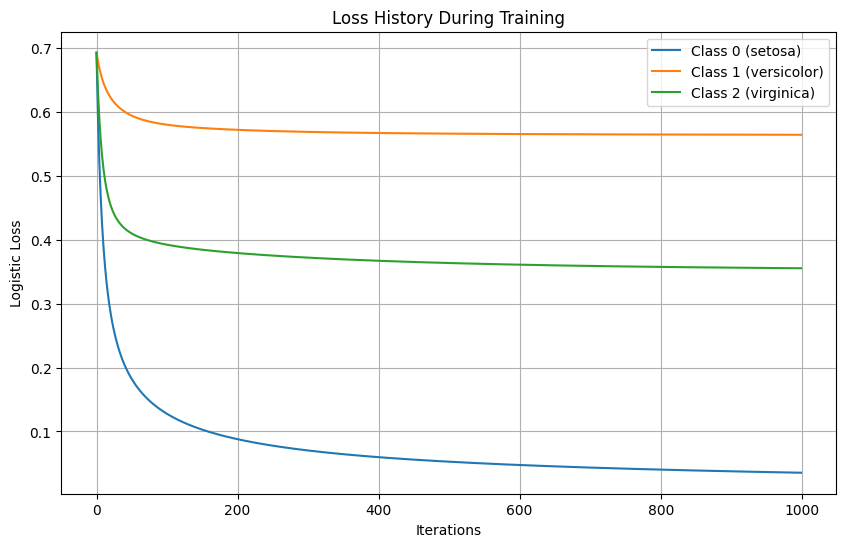

In [8]:
trained_weights, loss_histories = parte()
